# Classifying Dogs vs. Cats: Part I
### Notebook by Erika Deckter
This notebook uses a subset of the Kaggle Dogs vs. Cats image dataset to build a convoluation neural network classifier.  The code is adapted from _Deep Learning with Python_ by Francois Chollet.  This book was used as the textbook for my Deep Learning class and I highly recommend it as a fantastic introduction to Deep Learning and the Keras framework in Python.

In [1]:
#Import packages
import os
import shutil
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


## Data Preparation
The dataset for this notebook can be found here: https://www.kaggle.com/c/dogs-vs-cats/data.   

In order to run this notebook, the "train.zip" file needs to be downloaded and unzipped on the local machine.

In [2]:
#Local path of the original unzipped data file
original_dataset_dir = os.getcwd()+'/data/train'
#Check directory path
original_dataset_dir

'C:\\Erika\\Python\\Dogs vs Cats/data/train'

The original training dataset has approximately 25,000 images of dogs and cats.  For this exericse, we will be using a small subset of the data (2,000 total images, split among training, validation and test).  New folders for training, validation and test for each category are created below.

In [3]:
#Prepare directories for training, validation and test directories
base_dir = os.getcwd()+'/data/cats_and_dogs_small'    

if os.path.exists(base_dir)==False:
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')                                
if os.path.exists(train_dir)==False:
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
if os.path.exists(validation_dir)==False:
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if os.path.exists(test_dir)==False:
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')                           
if os.path.exists(train_cats_dir)==False:
    os.mkdir(train_cats_dir)                                                   
train_dogs_dir = os.path.join(train_dir, 'dogs')                           
if os.path.exists(train_dogs_dir)==False:
    os.mkdir(train_dogs_dir)                                                   

validation_cats_dir = os.path.join(validation_dir, 'cats')                 
if os.path.exists(validation_cats_dir)==False:
    os.mkdir(validation_cats_dir)                                              
validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
if os.path.exists(validation_dogs_dir)==False:
    os.mkdir(validation_dogs_dir)                                              

test_cats_dir = os.path.join(test_dir, 'cats')                             
if os.path.exists(test_cats_dir)==False:
    os.mkdir(test_cats_dir)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
if os.path.exists(test_dogs_dir)==False:
    os.mkdir(test_dogs_dir)

This code creates the subset of images and places them in teh folders create above.

In [4]:
#Fill training/validation and test directories with subset of original Kaggle data                                              
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)

In [5]:
#Check number of files in each directory
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Keras has a built-in image generator function, which allows the model to read batches of images into memory for processing.  This means that even a large number of images can be handled with a relatively small amount of RAM, based on the batch size.  

The image generator also allows the images to be resized (in this case, we are resizing to 150 x 150 pixels).  The image values on each of the RGB channels are also normalized by rescaling from between 0 and 255 to between 0 and 1.

In [6]:
#Build image generator with no data augmentation
train_datagen = ImageDataGenerator(rescale=1./255) #Scale between 0 and 1
test_datagen = ImageDataGenerator(rescale=1./255)  #Scale between 0 and 1

train_generator = train_datagen.flow_from_directory(
        train_dir,                                             
        target_size=(150, 150), #Resize image to 150x150
        batch_size=20, #Set each batch to contain 20 cute dogs or cats
        class_mode='binary') #Assign a binary class (cat or dog)                                 

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Modeling
A convolutional neural network (CNN) model will be used to classify the images as either dogs or cats.  The CNN model consists of four 2D convolutional layers, each followed by a max pooling layer.  The output of the final max pooling layer is flattened into a single vector and then fed through a dense layer (using a ReLu activation function).  The final output layer uses a sigmoid activation function.

In [7]:
#Function to build CNN for binary classification
def build_cnn(learning_rate):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=learning_rate),
                  metrics=['acc'])
    
    return model

The model uses binary crossentropy as the loss function.  This is how the model determines how far off the predictions are from the reality (based on the actual labels in the training dataset).  The RMS Prop algorithm is used for updating the model parameters for each batch, using a learning rate of 0.0001 (this is a hyperparameter than can be adjusted).

In [8]:
#Call model-building function to create a new model to train
cnn_model = build_cnn(learning_rate=1e-4)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

The cell below trains the Keras model on the training data, saving information on the loss and accuracy for the validation dataset (i.e., an unseen dataset) at each epoch.  An epoch is one passthrough of the entire training dataset.  In this case, there are 100 iterations per epoch.

In [9]:
#Train model using image generator (rather than a traditional training/validation set)
history = cnn_model.fit_generator(train_generator,
                                  steps_per_epoch=100, #2,000 training examples/20 samples per batch
                                  epochs=20,
                                  validation_data=validation_generator,
                                  validation_steps=50 #1,000 validation examples/20 samples per batch
                                 )

Epoch 1/20
100/100 [==============================] - 178s 2s/step - loss: 0.6879 - acc: 0.5490 - val_loss: 0.6808 - val_acc: 0.5130
Epoch 2/20
100/100 [==============================] - 174s 2s/step - loss: 0.6615 - acc: 0.6015 - val_loss: 0.7230 - val_acc: 0.5070
Epoch 3/20
100/100 [==============================] - 176s 2s/step - loss: 0.6161 - acc: 0.6560 - val_loss: 0.6019 - val_acc: 0.6750
Epoch 4/20
100/100 [==============================] - 176s 2s/step - loss: 0.5729 - acc: 0.7085 - val_loss: 0.5904 - val_acc: 0.6650
Epoch 5/20
100/100 [==============================] - 177s 2s/step - loss: 0.5441 - acc: 0.7135 - val_loss: 0.5675 - val_acc: 0.6940
Epoch 6/20
100/100 [==============================] - 177s 2s/step - loss: 0.5209 - acc: 0.7265 - val_loss: 0.5665 - val_acc: 0.6980
Epoch 7/20
100/100 [==============================] - 177s 2s/step - loss: 0.4890 - acc: 0.7655 - val_loss: 0.5514 - val_acc: 0.7030
Epoch 8/20
100/100 [==============================] - 177s 2s/step - 

The training and validation accuracy and loss can be seen for each epoch in the matplotlib visualizations below.  The number of epochs to train a model is a hyperparameter that needs to be tuned.  Running a model for too many epochs can result in overtraining (e.g., the model is simply memorizing characteristics of the training data and will no longer generalize well to new, unseen data).  This is why it is important to look at accuracy and loss for data that was not used to train the model.  The reason we use the validation dataset and not the test dataset is because we want to keep a dataset that is entirely prestine to test the final version of the model.  Since the validation dataset is used to tune hyperparameters, it is no longer considered true "unseen" data for the purposes of model evaluation.

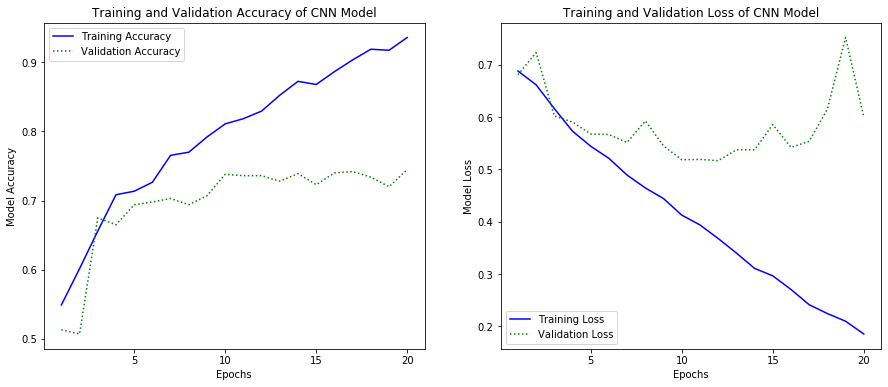

In [14]:
#Plot accuracy and loss for first model
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)

fig = plt.figure(figsize=(15,6))
#Create accuracy plot
fig.add_subplot(1,2,1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'g:', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')
plt.xticks([5,10,15,20])
plt.title('Training and Validation Accuracy of CNN Model')
fig.add_subplot(1,2,2)
#Create loss plot
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'g:', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Loss')
plt.xticks([5,10,15,20])
plt.title('Training and Validation Loss of CNN Model') 
plt.show()

Retrain the model using 10 epochs, based on the validation loss and accuracy and save a final version of the model.  While teh training loss keeps increasing beyond 10 epochs, the validation accuracy starts to increase again, indicating overfitting.

In [15]:
#Train final model CNN model for 10 epochs
cnn_model = build_cnn(learning_rate=1e-4)

cnn_model.fit_generator(train_generator,
                    steps_per_epoch=100, #2,000 training examples/20 samples per batch
                    epochs=10)

Epoch 1/10
100/100 [==============================] - 104s 1s/step - loss: 0.6907 - acc: 0.5250
Epoch 2/10
100/100 [==============================] - 104s 1s/step - loss: 0.6601 - acc: 0.6135
Epoch 3/10
100/100 [==============================] - 104s 1s/step - loss: 0.6134 - acc: 0.6635
Epoch 4/10
100/100 [==============================] - 104s 1s/step - loss: 0.5731 - acc: 0.7135
Epoch 5/10
100/100 [==============================] - 104s 1s/step - loss: 0.5355 - acc: 0.7335
Epoch 6/10
100/100 [==============================] - 106s 1s/step - loss: 0.5049 - acc: 0.7535
Epoch 7/10
100/100 [==============================] - 104s 1s/step - loss: 0.4766 - acc: 0.7685
Epoch 8/10
100/100 [==============================] - 104s 1s/step - loss: 0.4480 - acc: 0.7945
Epoch 9/10
100/100 [==============================] - 104s 1s/step - loss: 0.4182 - acc: 0.8115
Epoch 10/10
100/100 [==============================] - 104s 1s/step - loss: 0.3854 - acc: 0.8285


In [16]:
#Evaluate model on test data (to see how it performs on new, unseen data)
test_loss, test_accuracy = cnn_model.evaluate_generator(test_generator, steps=50)
print('Test Loss for CNN Model: {:.4f}'.format(test_loss))
print('Test Accuracy for CNN Model: {:.2%}'.format(test_accuracy))

Test Loss for CNN Model: 0.5699
Test Accuracy for CNN Model: 71.70%


## Data Augmentation
One way to get more data "for free" is to use data augmentation on the training data.  This is done by performing random transformation to the training images so that the model never sees exactly the same image twice.  This is a way to increase the data sample and avoid overfitting.

In [17]:
#Create new image generator for the training data that performs random transformations on the images
#Note: Transformations should NOT be performed on validation/test data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#Create generator
train_augmented_generator = train_datagen_augmented.flow_from_directory(
        train_dir,                                             
        target_size=(150, 150), #Resize image to 150x150
        batch_size=20, #Set each batch to contain 20 cute dogs or cats
        class_mode='binary') #Assign a binary class (cat or dog)

Found 2000 images belonging to 2 classes.


The original image


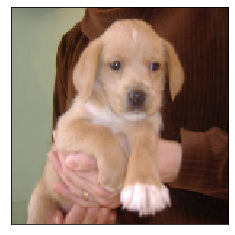

The augmented images


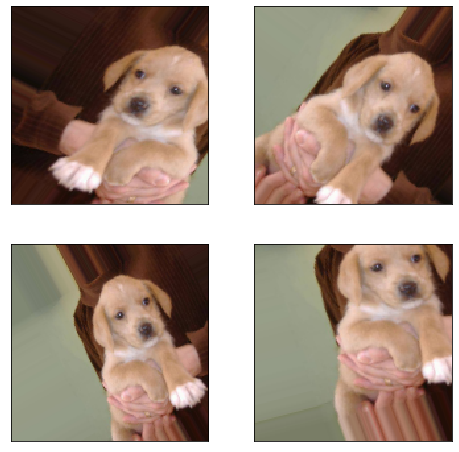

In [18]:
#Visualize random transformations for one dog training example
fnames = [os.path.join(train_dogs_dir, fname) for
     fname in os.listdir(train_dogs_dir)]

img_path = fnames[6] #Pick the 7th training dog image (a very good puppy)
img = image.load_img(img_path, target_size=(150, 150))       

x = image.img_to_array(img)                                   
x = x.reshape((1,) + x.shape)

print('The original image')                                                      
i = 0
for batch in train_datagen.flow(x, batch_size=1):                     
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                 
    if i % 1 == 0:                                              
        break #Stop after 1 image
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
plt.show()

print('The augmented images')
#Create matplotlib figure
fig = plt.figure(figsize=(8,8))

i = 1                                                          
for batch in train_datagen_augmented.flow(x, batch_size=1):                     
    ax = fig.add_subplot(2, 2, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 5 == 0:                                              
        break #Stop after 4 random transformation (otherwise, it will continue forever)                                             

plt.show()

In [21]:
#Call model-building function to create a new model to train
augmentation_model = build_cnn(learning_rate=1e-4)

#Train model using augmented training data
history = augmentation_model.fit_generator(train_augmented_generator,
                                           steps_per_epoch=100, #2,000 training examples/20 samples per batch
                                           epochs=50,
                                           validation_data=validation_generator,
                                           validation_steps=50 #1,000 validation examples/20 samples per batch
                                           )

Epoch 1/50
100/100 [==============================] - 188s 2s/step - loss: 0.6949 - acc: 0.5060 - val_loss: 0.6874 - val_acc: 0.5460
Epoch 2/50
100/100 [==============================] - 185s 2s/step - loss: 0.6846 - acc: 0.5535 - val_loss: 0.6728 - val_acc: 0.5970
Epoch 3/50
100/100 [==============================] - 188s 2s/step - loss: 0.6652 - acc: 0.5885 - val_loss: 0.6484 - val_acc: 0.5900
Epoch 4/50
100/100 [==============================] - 136s 1s/step - loss: 0.6513 - acc: 0.6130 - val_loss: 0.6424 - val_acc: 0.6250
Epoch 5/50
100/100 [==============================] - 140s 1s/step - loss: 0.6294 - acc: 0.6435 - val_loss: 0.5964 - val_acc: 0.6800
Epoch 6/50
100/100 [==============================] - 139s 1s/step - loss: 0.6167 - acc: 0.6575 - val_loss: 0.5906 - val_acc: 0.6830
Epoch 7/50
100/100 [==============================] - 129s 1s/step - loss: 0.6084 - acc: 0.6640 - val_loss: 0.6302 - val_acc: 0.6420
Epoch 8/50
100/100 [==============================] - 140s 1s/step - 

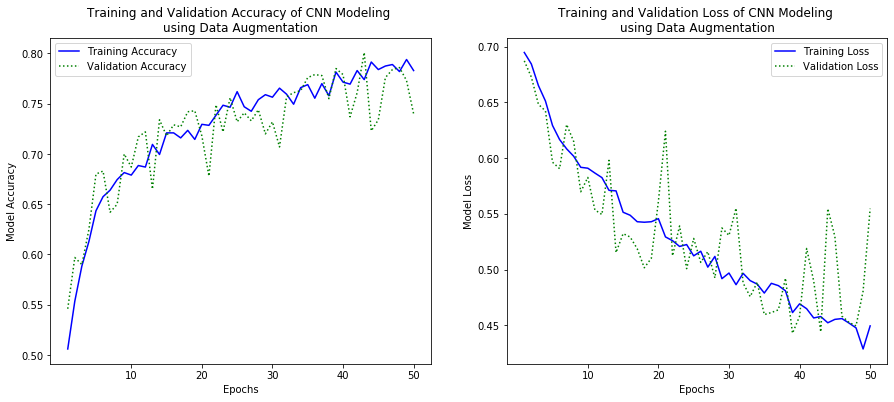

In [24]:
#Plot accuracy and loss for data augmentation model
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)

fig = plt.figure(figsize=(15,6))
#Create accuracy plot
fig.add_subplot(1,2,1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'g:', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')
plt.xticks(np.arange(10,51,10))
plt.title('Training and Validation Accuracy of CNN Modeling \nusing Data Augmentation')

#Create loss plot
fig.add_subplot(1,2,2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'g:', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Loss')
plt.xticks(np.arange(10,51,10))
plt.title('Training and Validation Loss of CNN Modeling \nusing Data Augmentation') 
plt.show()

In [25]:
#Evaluate model on test data (to see how it performs on new, unseen data)
test_loss, test_accuracy = augmentation_model.evaluate_generator(test_generator, steps=50)
print('Test Loss for CNN Model with Data Augmentation: {:.4f}'.format(test_loss))
print('Test Accuracy for CNN Model with Data Augmentation: {:.2%}'.format(test_accuracy))

Test Loss for CNN Model with Data Augmentation: 0.5635
Test Accuracy for CNN Model with Data Augmentation: 72.90%


## Dropout
Another way to improve the model fit (and avoid overfitting) is to use a regularization strategy.  For this CNN, we will rebuild the model with a dropout layer before the first densely connected layer using a dropout rate of 50% (half of the inputs to the densely connected layer are zeroed out during training).

In [26]:
def build_cnn_wDropout(learning_rate):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5)) #<- Dropout layer with 50% dropout rate!
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=learning_rate),
                  metrics=['acc'])
    
    return model

In [44]:
#Build new model with dropout
dropout_model = build_cnn_wDropout(learning_rate=5e-5)
dropout_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [45]:
#Train the model with data augmentation and dropout
history = dropout_model.fit_generator(train_augmented_generator,
                                      steps_per_epoch=100,
                                      epochs=100,
                                      validation_data=validation_generator,
                                      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 118s 1s/step - loss: 0.6952 - acc: 0.5010 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 122s 1s/step - loss: 0.6916 - acc: 0.5200 - val_loss: 0.6809 - val_acc: 0.6020
Epoch 3/100
100/100 [==============================] - 122s 1s/step - loss: 0.6829 - acc: 0.5545 - val_loss: 0.6689 - val_acc: 0.6050
Epoch 4/100
100/100 [==============================] - 123s 1s/step - loss: 0.6793 - acc: 0.5660 - val_loss: 0.6573 - val_acc: 0.6000
Epoch 5/100
100/100 [==============================] - 122s 1s/step - loss: 0.6716 - acc: 0.5775 - val_loss: 0.6912 - val_acc: 0.5250
Epoch 6/100
100/100 [==============================] - 122s 1s/step - loss: 0.6566 - acc: 0.6140 - val_loss: 0.6753 - val_acc: 0.5680
Epoch 7/100
100/100 [==============================] - 123s 1s/step - loss: 0.6534 - acc: 0.6080 - val_loss: 0.6427 - val_acc: 0.6240
Epoch 8/100
100/100 [==============================] - 122s 1s

Epoch 62/100
100/100 [==============================] - 182s 2s/step - loss: 0.4952 - acc: 0.7590 - val_loss: 0.5616 - val_acc: 0.7160
Epoch 63/100
100/100 [==============================] - 183s 2s/step - loss: 0.4943 - acc: 0.7510 - val_loss: 0.4877 - val_acc: 0.7560
Epoch 64/100
100/100 [==============================] - 182s 2s/step - loss: 0.5012 - acc: 0.7540 - val_loss: 0.4690 - val_acc: 0.7780
Epoch 65/100
100/100 [==============================] - 182s 2s/step - loss: 0.4898 - acc: 0.7610 - val_loss: 0.4741 - val_acc: 0.7680
Epoch 66/100
100/100 [==============================] - 182s 2s/step - loss: 0.4922 - acc: 0.7515 - val_loss: 0.4684 - val_acc: 0.7740
Epoch 67/100
100/100 [==============================] - 168s 2s/step - loss: 0.4822 - acc: 0.7640 - val_loss: 0.5003 - val_acc: 0.7570
Epoch 68/100
100/100 [==============================] - 152s 2s/step - loss: 0.4892 - acc: 0.7650 - val_loss: 0.4666 - val_acc: 0.7780
Epoch 69/100
100/100 [==============================] -

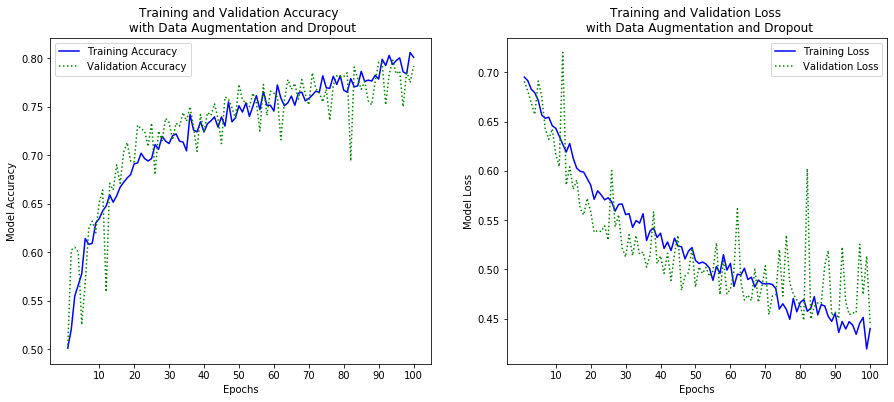

In [46]:
#Plot results of model using data augmentation and dropout
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)

fig = plt.figure(figsize=(15,6))
#Create accuracy plot
fig.add_subplot(1,2,1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'g:', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')
plt.xticks(np.arange(10,101,10))
plt.title('Training and Validation Accuracy \n with Data Augmentation and Dropout')

#Create loss plot
fig.add_subplot(1,2,2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'g:', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Loss')
plt.xticks(np.arange(10,101,10))
plt.title('Training and Validation Loss \n with Data Augmentation and Dropout') 
plt.show()

In [47]:
#Evaluate model on test data (to see how it performs on new, unseen data)
test_loss, test_accuracy = dropout_model.evaluate_generator(test_generator, steps=50)
print('Test Loss for CNN Model with Dropout and Data Augmentation: {:.4f}'.format(test_loss))
print('Test Accuracy for CNN Model with Dropout and Data Augmentation: {:.2%}'.format(test_accuracy))

Test Loss for CNN Model with Dropout and Data Augmentation: 0.4631
Test Accuracy for CNN Model with Dropout and Data Augmentation: 77.90%
